3.535163790827692
3.5679015478588365
4.408042066718216
4.808930212883881
4.978815338917016
6.872612340325574
5.107030595963149
5.068405358275401


Text(0, 0.5, 'Frequency')

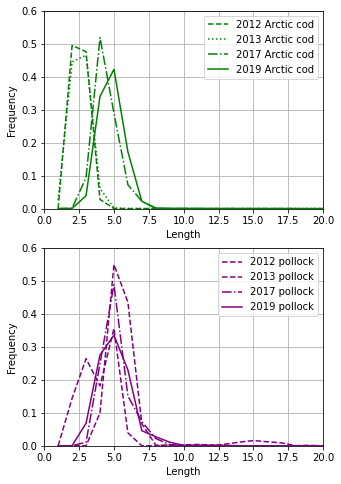

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (5,8))
plt.subplot(211)
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2012_v2.csv')
df2013 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_Arctic_cod_by_length_alongtrack_fish_per_m_squared_2013_v2.csv')
df2017 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201701_21725.csv')
df2019 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201901_21725.csv')
print(sum(df2012[df2012.Latitude >=65.9].sum()[3:]/sum(df2012[df2012.Latitude >=65.9].sum()[3:])*np.arange(2,31,1)))
print(sum(df2013[df2013.Latitude >=65.9].sum()[3:]/sum(df2013[df2013.Latitude >=65.9].sum()[3:])*np.arange(2,31,1)))
print(sum(df2017.sum()[3:23]/sum(df2017.sum()[3:23])*np.arange(1,19,1)))
print(sum(df2019.sum()[3:23]/sum(df2019.sum()[3:23])*np.arange(1,21,1)))
plt.plot(np.arange(1,30,1),df2012[df2012.Latitude >=65.9].sum()[3:]/sum(df2012[df2012.Latitude >=65.9].sum()[3:]),linestyle='--', color = '#008000')
plt.plot(np.arange(1,30,1),df2013[df2013.Latitude >=65.9].sum()[3:]/sum(df2013[df2013.Latitude >=65.9].sum()[3:]),linestyle=':', color = '#008000')
plt.plot(np.arange(1,19,1),df2017.sum()[3:23]/sum(df2017.sum()[3:23]),linestyle='-.', color = '#008000')
plt.plot(np.arange(1,21,1),df2019.sum()[3:23]/sum(df2019.sum()[3:23]),linestyle='-', color = '#008000')
plt.xlim(0,20)
plt.ylim(0,0.6)
plt.grid()
plt.legend(['2012 Arctic cod','2013 Arctic cod','2017 Arctic cod','2019 Arctic cod'])
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(212)
df2012 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_pollock_by_length_alongtrack_fish_per_m_squared_2012_for_IERP.csv')
df2013 = pd.read_csv('../data/catchData/2012_2013/Arctic_EIS_AT_survey_pollock_by_length_alongtrack_fish_per_m_squared_2013_for_IERP.csv')
df2017 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201701_21744.csv')
df2019 = pd.read_csv('../data/catchData/2017_2019/Arctic_EIS_201901_21744.csv')
print(sum(df2012.sum()[3:23]/sum(df2012.sum()[3:23])*np.arange(2,22,1)))
print(sum(df2013.sum()[3:23]/sum(df2013.sum()[3:23])*np.arange(2,22,1)))
print(sum(df2017.sum()[3:23]/sum(df2017.sum()[3:23])*np.arange(1,19,1)))
print(sum(df2019.sum()[3:23]/sum(df2019.sum()[3:23])*np.arange(1,21,1)))
plt.plot(np.arange(1,21,1),df2012.sum()[3:23]/sum(df2012.sum()[3:23]),linestyle='--',color = '#800080')
plt.plot(np.arange(1,21,1),df2013.sum()[3:23]/sum(df2012.sum()[3:23]),linestyle='--',color = '#800080')
plt.plot(np.arange(1,19,1),df2017.sum()[3:23]/sum(df2017.sum()[3:23]),linestyle='-.',color = '#800080')
plt.plot(np.arange(1,21,1),df2019.sum()[3:23]/sum(df2019.sum()[3:23]),linestyle='-',color = '#800080')
plt.xlim(0,20)
plt.ylim(0,0.6)
plt.grid()
plt.legend(['2012 pollock','2013 pollock','2017 pollock','2019 pollock'])
plt.xlabel('Length')
plt.ylabel('Frequency')

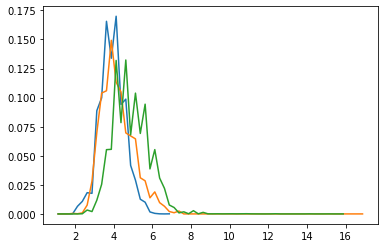

In [8]:
a = pd.read_csv('../data/catchData/2017_2019/specimen_complete_selectivity.csv')
for survey in [2013001,201701,201901]:
    b = a[a.SURVEY==survey]
    c = b[(b.SPECIES_CODE==21725) & (b.GEAR == 'Marinovich') & (b.NET_PARTITION== 'Codend')]
    cts = []
    for l in np.arange(1, np.ceil(c.CONSISTENT_LENGTH.max()),.25):
        cts.append(c[(c.CONSISTENT_LENGTH >= l) & (c.CONSISTENT_LENGTH < l+.25)].totalExp.sum())
    plt.plot(np.arange(1, np.ceil(c.CONSISTENT_LENGTH.max()),.25)+.125,cts/sum(cts))